### 필요한 패키지들

In [163]:
%config IPCompleter.greedy=True

In [164]:
import mlxtend

In [165]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import scipy.stats as stats
from sklearn.model_selection import train_test_split
%matplotlib inline

### 데이터 불러들이기 및 확인

In [166]:
# 모두 불러놓고, 같이 처리를 할 것 -> kaggle 업로드를 하기 위해서
# 참고) 본인 경로에 맞춰서 설정
path1 = "C:/Users/NTX550/Desktop/권지원/5/house_reg/house_reg/house_reg/train.csv"
path2 = "C:/Users/NTX550/Desktop/권지원/5/house_reg/house_reg/house_reg/test.csv"
train_df = pd.read_csv(path1)
test_df = pd.read_csv(path2)

In [167]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [168]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [169]:
    """
    MSSubClass : 매매와 관련된 주거 타입 식별
    MSZoning : 매매의 일반적인 지역 분류
    LotFrontage : 부동산과 연결된 도로의 선형 피트
    LotArea : 평방피트 단위의 부지 크기
    Street : 부동산으로의 도로(street) 접근 유형
    Alley : 부동산으로의 골목(alley) 접근 유형
    LotShape : 부동산의 일반적인 모양
    LandContour : 부동산의 평탄도
    Utilities : 사용 가능한 유틸리티(수도전기가스) 유형
    LotConfig : 지역 구성
    LandSlope : 부동산의 경사
    Neighborhood : 에임스 시 경계 내의 물리적인 위치
    Condition1 : 주요 도로 및 철도와의 근접성
    Condition2 : 주요 도로 및 철도와의 근접성 (두 개 이상 존재하는 경우)
    BldgType : 주거 유형
    HouseStyle : 주거 스타일
    OverallQual : 전체적인 재료 및 마감 등급
    OverallCond : 집의 전체적인 상태 등급
    YearBuilt : 원래 공사일
    YearRemodAdd : 리모델링 날짜 (리모델링 혹은 추가가 없었던 경우 공사일과 동일)
    RoofStyle : 지붕 유형
    RoofMatl : 지붕 재료
    Exterior 1st : 주택 외장재
    Exterior 2nd : 주택 외장재 (두 개 이상 존재하는 경우)
    MasVnrType : 벽돌 베니어 유형
    MasVnrArea : 벽돌 베니어 면적 (평방피트)
    ExterQual : 외장재 품질
    ExterCond : 외장재 현재 상태
    Foundation : 토대 유형
    BsmtQual : 지하의 높이 평가
    BsmtCond : 지하실 일반적인 상태 평가
    BsmtExposure : 워크아웃 혹은 정원 수준의 벽
    BsmtFinType1 : 지하 마감면의 품질
    BsmtSF1 : 유형 1 마감 평방피트
    BsmtFinType2 : 지하 마감면의 품질 (있는 경우)
    BsmtSF2 : 유형 2 마감 평방피트
    BsmtUnfSF : 마감되지 않은 지하실 면적
    TotalBsmtSF : 지하 총 평방피트
    Heating : 난방 유형
    HeatingQC : 난방 품질 및 상태
    CentralAir : 중앙 에어컨 여부
    Electrial : 전기 시스템
    1stFlrSF : 1층 평방피트
    2ndFlrSF : 2층 평방피트
    LowQualFinSF : 저품질 마감 평방 피트 (모든 층)
    GrLivArea : 지상 거실 면적 평방 피트
    BsmtFullBath : 지하 전체 욕실
    BsmtHalfBath : 지하 반 욕실
    FullBath : 지하층 위의 전체 욕실
    HalfBath : 지하층 위의 반 욕실
    Bedroom : 지하층 위의 침실 수 (지하 침실은 포함하지 않음)
    Kitchen : 지하층 위의 주방 수
    KitchenQual : 주방 품질
    TotRmsAbvGra : 지하층 위의 모든 방 (욕실 제외)
    Functional : 집 기능 (공제가 보장되지 않는 한 일반적인 경우 가정)
    FirePlace : 벽난로 수
    FireplaceQu : 벽난로 품질
    GarageType : 차고 위치
    GarageYrBlt : 차고 건설 연도
    GarageFinish : 차고 내부 마감
    GarageCars : 차량 수용 가능 차고 크기
    GarageArea : 차고 평방피트
    GarageQual : 차고 품질
    GarageCond : 차고 상태
    PavedDrive : 포장된 진입로
    WoodDeckSF : 평방피트 단위의 목재 데크 면적
    OpenPochSF : 평방피트 단위의 개방 현관 면적
    EnclosedPorch : 평방피트 단위의 닫힌 현관 면적
    3SnPorch : 평방 피트의 세 계절 현관 면적
    ScreenPorch : 평방피트 단위의 스크린 현관 면적
    PoolArea : 평방피트 단위의 수영장 면적
    PoolQC : 수영장 품질
    Fence : 울타리 품질
    MiscFeature : 다른 항목에서 다루지 않는 기타 특징
    MiscVal : 기타 특징의 가치
    MoSold : 월 판매
    YrSold : 연 판매
    SaleType : 판매 유형
    SaleCondition : 판매 상태
    """

'\nMSSubClass : 매매와 관련된 주거 타입 식별\nMSZoning : 매매의 일반적인 지역 분류\nLotFrontage : 부동산과 연결된 도로의 선형 피트\nLotArea : 평방피트 단위의 부지 크기\nStreet : 부동산으로의 도로(street) 접근 유형\nAlley : 부동산으로의 골목(alley) 접근 유형\nLotShape : 부동산의 일반적인 모양\nLandContour : 부동산의 평탄도\nUtilities : 사용 가능한 유틸리티(수도전기가스) 유형\nLotConfig : 지역 구성\nLandSlope : 부동산의 경사\nNeighborhood : 에임스 시 경계 내의 물리적인 위치\nCondition1 : 주요 도로 및 철도와의 근접성\nCondition2 : 주요 도로 및 철도와의 근접성 (두 개 이상 존재하는 경우)\nBldgType : 주거 유형\nHouseStyle : 주거 스타일\nOverallQual : 전체적인 재료 및 마감 등급\nOverallCond : 집의 전체적인 상태 등급\nYearBuilt : 원래 공사일\nYearRemodAdd : 리모델링 날짜 (리모델링 혹은 추가가 없었던 경우 공사일과 동일)\nRoofStyle : 지붕 유형\nRoofMatl : 지붕 재료\nExterior 1st : 주택 외장재\nExterior 2nd : 주택 외장재 (두 개 이상 존재하는 경우)\nMasVnrType : 벽돌 베니어 유형\nMasVnrArea : 벽돌 베니어 면적 (평방피트)\nExterQual : 외장재 품질\nExterCond : 외장재 현재 상태\nFoundation : 토대 유형\nBsmtQual : 지하의 높이 평가\nBsmtCond : 지하실 일반적인 상태 평가\nBsmtExposure : 워크아웃 혹은 정원 수준의 벽\nBsmtFinType1 : 지하 마감면의 품질\nBsmtSF1 : 유형 1 마감 평방피트\nBsmtFinType2 : 지하 마감면의 품질 (있는 경우)\nBsmtSF2 : 유형 2 

### 이상치 들에 대해서 확인!!!

* outlier에 대한 것들에 대한 확인 : 아래 경우에 대해서 확인을 하면, 오른쪽 아래 쪽에 이상하게 튀는 애들이 존재!!!

<Figure size 640x480 with 0 Axes>

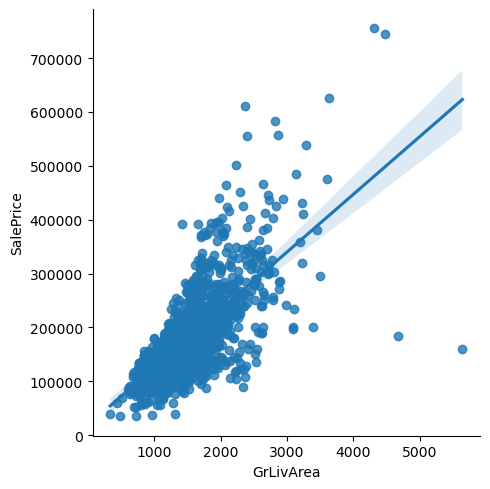

In [170]:
# 회귀분석을 할 떄에는 우리의 관심사인 가격에 대해서 편차들을 체크
# -> outlier 에 대한 고민/체크 *******
# 참고) 대회에 따라서 아웃라이어에 대한 감점을 강하게 할 수 있고, 약하게 할 수 있음

plt.figure()
otl = sns.lmplot(data=train_df, x = "GrLivArea", y = "SalePrice")

* 위에 대한 데이터를 보고, outlier를 처리하기 위한 조건 선택

In [171]:
# GrLivArea의 면적의 크기가 4000 초과인 데이터만 보자
train_df[train_df["GrLivArea"]>4000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [172]:
# loc를 이용을 해서 가로에서는 불리언 인덱싱으로 추리고,
# 세로에서는 볼 컬럼에 대해서 리스트 업
train_df.loc[train_df["GrLivArea"]>4000, ["SalePrice", "GrLivArea"]]

,SalePrice,GrLivArea
523,184750,4676
691,755000,4316
1182,745000,4476
1298,160000,5642


In [173]:
train_df[train_df["GrLivArea"]>4000].index

Int64Index([523, 691, 1182, 1298], dtype='int64')

In [174]:
# outlier 지우기
# 특정한 데이터를 지울 때: drop + 조건: 불리언 인덱싱
train_df.drop(train_df[train_df["GrLivArea"]>4000].index, inplace=True )

<Figure size 640x480 with 0 Axes>

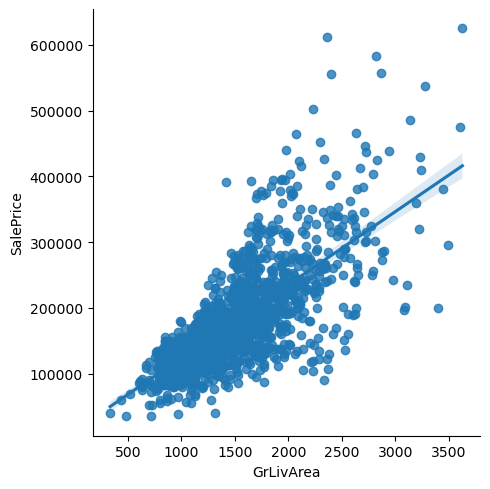

In [175]:
plt.figure()
otl = sns.lmplot(data=train_df, x = "GrLivArea", y="SalePrice")


In [176]:
print(train_df.shape)

(1456, 81)


* Target Value에 대한 것을 확인!

In [177]:
# 기존의 1460개의 데이터 중에서 outlier 4개를 제거
# 참고) 대회의 평가 기준이 고가 주택을 잘 맞추면 가산점 주겠다
# outlier를 그냥 지우면 안되고 어떻게 처리할지 고민 필요

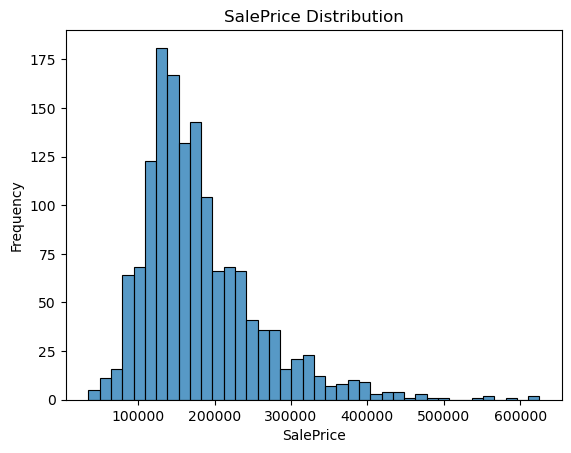

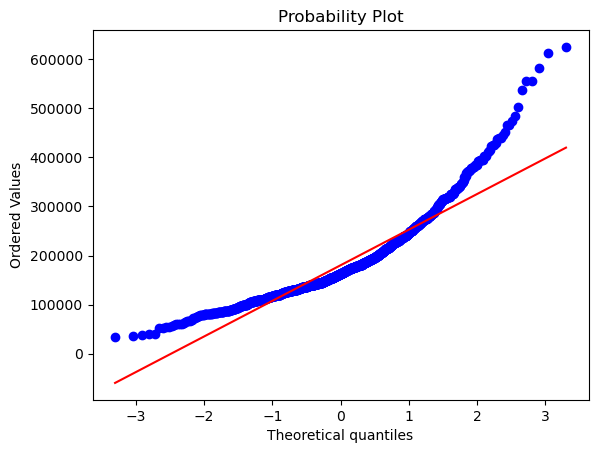

Skewness: 1.566


In [178]:
# 아직 seaborn 에서 stats로 넘기는 부분에서 워닝 부분이 안 되어서 아직은 여기서 워닝에 대한 부분은 타나남.
sns.histplot(train_df['SalePrice'])
plt.title('SalePrice Distribution')
plt.ylabel('Frequency')
plt.figure()

# stats에 바로 접근하는 부분에 있어서는 array로 명확하게 변환을 해서 넘기면 워닝은 없어짐!!!!
qq = stats.probplot(np.array(train_df['SalePrice']), plot=plt)
plt.show()
print("Skewness: {:.3f}".format(train_df['SalePrice'].skew()))



* 타겟에 대한 로그 변환 취하기 : 양수에 대해서 처리 하고자 하니 +1을 하고 로그를 취해서 0의 값에 대해서 발생할 수 있는 문제에 대한 것 방지!

In [179]:
# log1p : log(1 + input) -> np.log1p(y) : log(y+1)
# 회귀문제를 푸는 방식 중에서 종종 사용되는 기술적인 방법 중 하나
train_df["SalePrice"]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1456, dtype: int64

In [180]:
np.log1p(train_df["SalePrice"])

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1456, dtype: float64

In [181]:
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])

* 로그를 취하면 그 결과가 치우친 부분들이 어떻게 되는지 확인

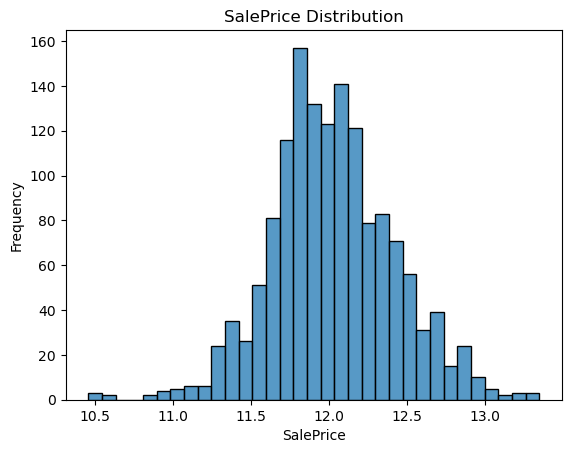

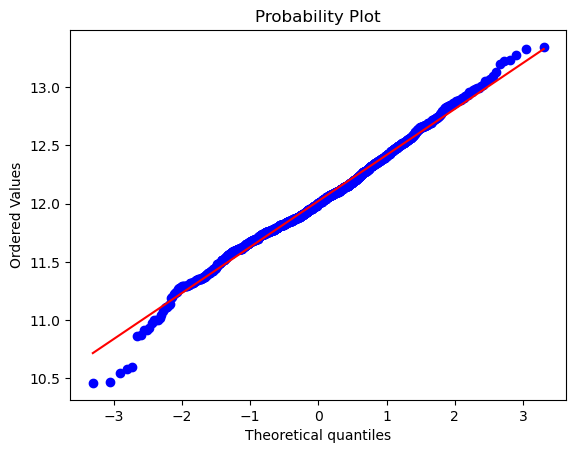

Skewness: 0.065


In [182]:
sns.histplot(train_df['SalePrice'])
plt.title('SalePrice Distribution')
plt.ylabel('Frequency')

plt.figure()
qq = stats.probplot(np.array(train_df['SalePrice']), plot=plt)
plt.show()

print("Skewness: {:.3f}".format(train_df['SalePrice'].skew()))

In [183]:
# 펌핑을 해서 좀 더 펴줌 skewness 가 더 예쁘게 됨

In [184]:
"""
 참고) 로그 변환의 장점
 1. 값의 변동 대역을 줄여서 오차를 좀 모델의 예측 변동 폭을 줄일 수 있음
 2. 값의 분포를 한 쪽으로 치우친 것을 조금이라도 정규분포틱하게 풀 수 있음
 -> 모델 자체가 일반적인 선형회귀모델들은 정규성을 가정
    주어진 데이터도 이 가정에 최대한 부합할수록 모델이 잘 됨
    tree 이런 모델은 별로 상관 X <-> lasso, ridge + xgb, rf
+ 참고) 사용하는데 논란이 없는 경우도 있고, 가끔 논문에 따라서 쓰면 별로라는 논문도 있음
-> 도메인 관련 논문을 참조
-----> 값의 변화/변동 Transform 이라고 하지, 정규화라고 따로 이야기 하지 않음!
"""

'\n 참고) 로그 변환의 장점\n 1. 값의 변동 대역을 줄여서 오차를 좀 모델의 예측 변동 폭을 줄일 수 있음\n 2. 값의 분포를 한 쪽으로 치우친 것을 조금이라도 정규분포틱하게 풀 수 있음\n -> 모델 자체가 일반적인 선형회귀모델들은 정규성을 가정\n    주어진 데이터도 이 가정에 최대한 부합할수록 모델이 잘 됨\n    tree 이런 모델은 별로 상관 X <-> lasso, ridge + xgb, rf\n+ 참고) 사용하는데 논란이 없는 경우도 있고, 가끔 논문에 따라서 쓰면 별로라는 논문도 있음\n-> 도메인 관련 논문을 참조\n-----> 값의 변화/변동 Transform 이라고 하지, 정규화라고 따로 이야기 하지 않음!\n'

* 보통은 전체 특성들에 대해서 다 상관계수나 pairplot을 그려보겠지만, 지금은 너무 데이터가 많이 있기에 하기가 힘들다. 그래서 상위 몇 개의 상관계수가 높은 것들에 대해서만 보고자 함!!!!      
해석 : 그래서 보면 집가격에 영향을 미치는 상위 10개에 대해서 확인을 한 결과 퀄리티에 관련된 (OverallQual,FullBath, YearBuilt, YearRemodAdd)와 크기에 대한 (GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF) 부분들이 중요한 부분으로 차지하고 있음!!!

C:\Users\NTX550\AppData\Local\Temp\ipykernel_11520\3021127349.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_train = train_df.corr()


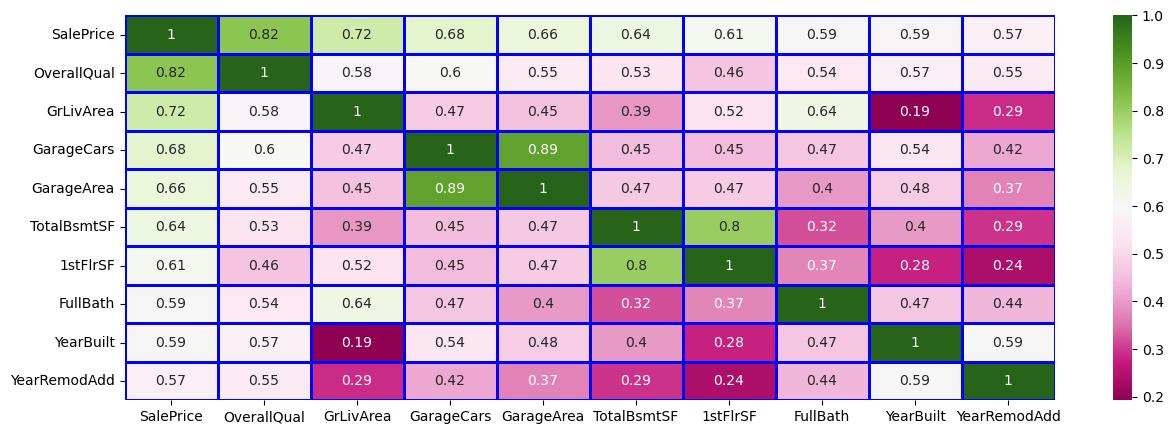

In [185]:
# -> 좀 더 디테일하게 EDA 를 할 때, 기준이 상관계수... 
plt.figure(figsize=(15,5))

corr_train = train_df.corr()


num = 10 # 내가 볼 10개의 상관계수가 높은 컬럼의 수
col = corr_train.nlargest(num, 'SalePrice')['SalePrice'].index
coeff = np.corrcoef(train_df[col].values.T)

# heatmap
heatmp = sns.heatmap(coeff, 
                     annot = True, 
                     xticklabels = col.values, yticklabels = col.values, 
                     linewidth=2,cmap='PiYG', linecolor='blue')

In [186]:
# pairplot의 경우는 모든 변수들의 2개의 조합으로 실제 데이터를 뿌는 것이기에
# -> 전체 데이터를 그냥 다하면 nC2의 조합으로 늘어나서 메모리 렉...
# -> 유의해서 진행해야 하고, 샘플링 같은 방식을 써야 함

# sns.pairplot(train_df[col], height=3)

In [187]:
# 기존의 EDA처럼 주어진 데이터들을 하나씩 EDA를 진행해야 함
# 여기서는 시간관계상 넘어가는 부분이 있음
# 이 부분이 어떻게 하느냐가 모델의 성능을 좌우함
# + 회귀같은 경우에는 y값에 대해서 변환을 할 수 있음


In [188]:
# 참고) 밑의 코드들은 기계적으로 진행을 하는 부분이 있음
# 감안해서 보면 됨

### 변수들 정리 : Feature / Target 분리

* 변수 분리 : 특징과 라벨에 대한 분리 작업 수행 ---> id라는 컬럼은 맨 앞에 있어서 0번으로 선택을 해서 지운 것이며, 학습할 특징에서는 제외를 하여야 하기에 drop을 이용해서 지우게 됨!!!  
처음에는 81개의 컬럼이 있었는데, 의미없는 id 컬럼 제거 & 타겟에 대한 가격에 대한 것 제거를 ㅎ서 총 81개에서 2개를 제외한 79개로 수정이 됨!!!!

In [189]:
# id의 값은 단순히 문제 번호인데, 학습을 하는 과정에서는 의미가 없어서 제거를 해야 하는 칼럼인데
# 나중에 최종 정답지 제출을 위해서 남겨두겠음
train_id = train_df["Id"] # 잘라두었지만, 실질적인 활용 X
test_id = test_df["Id"] # 정답 제출할 때 문제 번호로 사용할 것
# 이유는 정답지 제출 양식이 문제 번호, 예측 가격

# 학습하거나, 문제를 풀때는 Id 칼럼이 전혀 의미가 없어 제거
train_df.drop("Id", axis=1, inplace=True)
test_df.drop("Id", axis=1, inplace=True)
# -> train/test 모두 동일하게 Id 칼럼 제거

In [190]:
print(train_df.shape)
print(test_df.shape)

(1456, 80)
(1459, 79)


In [191]:
# train.csv 에서 문제지하고 정답지를 분리!
y_df = train_df["SalePrice"]
train_df.drop("SalePrice", axis=1, inplace=True)

print('dimension of the train:' , train_df.shape)
print('dimension of the test:' , test_df.shape)

dimension of the train: (1456, 79)
dimension of the test: (1459, 79)


* 우선은 나중에 사용하기 위해서, 문제들만 train/test 를 df라는 변수에 합쳐둔 것임!!~!

In [192]:
print('Data Shape:' , test_df.shape)
test_df.head()

Data Shape: (1459, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Feature Engineering

In [193]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1456 non-null   int64  
 1   MSZoning       1456 non-null   object 
 2   LotFrontage    1197 non-null   float64
 3   LotArea        1456 non-null   int64  
 4   Street         1456 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1456 non-null   object 
 7   LandContour    1456 non-null   object 
 8   Utilities      1456 non-null   object 
 9   LotConfig      1456 non-null   object 
 10  LandSlope      1456 non-null   object 
 11  Neighborhood   1456 non-null   object 
 12  Condition1     1456 non-null   object 
 13  Condition2     1456 non-null   object 
 14  BldgType       1456 non-null   object 
 15  HouseStyle     1456 non-null   object 
 16  OverallQual    1456 non-null   int64  
 17  OverallCond    1456 non-null   int64  
 18  YearBuil

#### Missing Data 처리를 위한 확인!

In [194]:
train_df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 79, dtype: int64

In [195]:
# Train data에 대한 누락된 데이터의 비율을 체크를 하려고 함
train_ms = pd.DataFrame(train_df.isnull().sum(), columns=["MissingCount"])
train_ms
# 1개 이상 누락된 데이터들을 대상으로 하겠다 -> 필터링
train_ms = train_ms[train_ms["MissingCount"]!=0]
train_ms
# 지금은 컬럼별로 누락된 데이터 수 + 누락비율까지 컬럼에 추가해서 
train_ms["Missing%"] = train_ms["MissingCount"]/len(train_df) * 100
# 누락된 비율이 큰 순서대로 내림차순으로 -> sort_values
train_ms.sort_values(by='Missing%', ascending=False)

,MissingCount,Missing%
PoolQC,1451,99.656593
MiscFeature,1402,96.291209
Alley,1365,93.750000
Fence,1176,80.769231
FireplaceQu,690,47.390110
LotFrontage,259,17.788462
GarageType,81,5.563187
GarageYrBlt,81,5.563187
GarageFinish,81,5.563187
GarageQual,81,5.563187


In [196]:
# Test에서도 확인
test_ms = pd.DataFrame(test_df.isnull().sum(), columns=["MissingCount"])
test_ms
# 1개 이상 누락된 데이터들을 대상으로 하겠다 -> 필터링
test_ms = test_ms[test_ms["MissingCount"]!=0]
# 지금은 컬럼별로 누락된 데이터 수 + 누락비율까지 컬럼에 추가해서 
test_ms["Missing%"] = test_ms["MissingCount"]/len(test_df) * 100
# 누락된 비율이 큰 순서대로 내림차순으로 -> sort_values
test_ms.sort_values(by='Missing%', ascending=False)

,MissingCount,Missing%
PoolQC,1456,99.794380
MiscFeature,1408,96.504455
Alley,1352,92.666210
Fence,1169,80.123372
FireplaceQu,730,50.034270
LotFrontage,227,15.558602
GarageCond,78,5.346127
GarageYrBlt,78,5.346127
GarageQual,78,5.346127
GarageFinish,78,5.346127


#### 빈 값들에 대해서 채우는 것 : None으로 처리할 것과 0으로 처리할 것으로 구분을 함!!! 아니면 중간값이나 이런 부분으로 채우고 싶으면 Imputer등에 대한 것들을 활용하면 됨!!!

##### 여기서는 None으로 채우고 싶음!!

In [197]:
# 중요한 사항 *********
# -> train에서 변형을 하면, 똑같은 기준으로 test에서 처릴 해야함
# 다만) 기준은 어디서 가지고 와야 하냐 : only train 데이터에서
# 중요) train에서 변경에 대한 룰을 잡고
# -> 그 룰을 train/test 동일 적용

In [198]:
# 79개의 컬럼 중에서 빵구난 값을 None 값으로 채울 컬럼들을 리스트업 한 것

nones = ['PoolQC', 'MiscFeature', 'Alley','Fence', 'FireplaceQu', 'GarageType','GarageFinish',
        'GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'MasVnrType']

for col in nones:
    train_df[col].fillna("None", inplace=True)
    test_df[col].fillna("None",inplace=True)

# 마치 test는 안보고, 혹시 누락이 이 컬럼에서 있다면, None으로 채우겠다 ㅋㅋ


##### 여기서는 0으로 채우고 싶음

In [199]:
# 수치형 컬럼들에서는 값이 없다면, 0으로 채우겠다
zeros = ['GarageYrBlt','GarageArea','GarageCars','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
         'BsmtFullBath','BsmtHalfBath','MasVnrArea']


for col in zeros:
    train_df[col].fillna("None", inplace=True)
    test_df[col].fillna("None",inplace=True)

# 마치 train만 보고 처리할 규칙을 설정한 대로 코드를 작성해야 함

##### Utilities 컬럼은 너무 많이 하나의 데이터로 되어 있어서, 특징으로 사용이 불가능 할 것임!! 그래서 제거하기로 함!

In [200]:
# train 에서는 누락이 없는 칼럼이지만, test에서는 누락이 있는 칼럼
train_df["Utilities"].value_counts()

AllPub    1455
NoSeWa       1
Name: Utilities, dtype: int64

In [201]:
test_df["Utilities"].value_counts()

AllPub    1457
Name: Utilities, dtype: int64

In [202]:
# -> 이 칼럼은 가격에 영향을 미치지 못하는 칼럼이기에
# 제거를 해야할 것음 (train에 대해서 eda를 하다보니)
# -> utilities 칼럼은 제거 ... train/test 모두 같이 제거
train_df.drop("Utilities", axis=1, inplace=True)
test_df.drop("Utilities", axis=1, inplace=True)

In [203]:
print(train_df)

      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave  None      Reg   
1             20       RL         80.0     9600   Pave  None      Reg   
2             60       RL         68.0    11250   Pave  None      IR1   
3             70       RL         60.0     9550   Pave  None      IR1   
4             60       RL         84.0    14260   Pave  None      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave  None      Reg   
1456          20       RL         85.0    13175   Pave  None      Reg   
1457          70       RL         66.0     9042   Pave  None      Reg   
1458          20       RL         68.0     9717   Pave  None      Reg   
1459          20       RL         75.0     9937   Pave  None      Reg   

     LandContour LotConfig LandSlope  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    Inside       Gtl  ...  

##### 아래의 컬럼들은 위의 Utilites와는 달리 너무까지는 아니지만, 빠진 것들도 존재를 하고, 많은 항목들도 있고, 치우친 것들이 있어서, 제일 많이 나타나는 항목으로 채우고자 함!!!!

In [204]:
train_df["MSZoning"].value_counts()

RL         1147
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [205]:
test_df["MSZoning"].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [206]:
~

SyntaxError: invalid syntax (2415351536.py, line 1)

In [ ]:
~

VinylSd    1025
MetalSd     450
HdBoard     441
Wd Sdng     410
Plywood     221
CemntBd     125
BrkFace      87
WdShing      56
AsbShng      44
Stucco       42
BrkComm       6
CBlock        2
AsphShn       2
Stone         2
ImStucc       1
Name: Exterior1st, dtype: int64

In [207]:
type(train_df["MSZoning"].mode())

pandas.core.series.Series

In [208]:
train_df["MSZoning"].value_counts().index[0]

'RL'

In [211]:
# 빵구난 데이터를 채우는 데 있어서, 앞에서처럼 종류에 대한 특징 칼럼인데,
# None 채우기에는 좀 그러한 상황 -> 최빈값으로 채울 칼럼에 대한 리스트 업
freq = ['MSZoning','Exterior1st',
        'Exterior2nd','SaleType','Electrical',
        'KitchenQual','Functional']

for fr in freq:
    train_df[fr].fillna(train_df[fr].mode()[0], inplace=True)
    # test_df[fr].fillna(test_df.df[fr].mode()[0], inplace=True)
#  test 기준 따로 train 기준 따로의 코드로 작성이 된 것임
    test_df[fr].fillna(train_df[fr].mode()[0], inplace=True)
# 최빈값의 기준에 있어서도 train으로 파약하고
# -> train/test에 모두 같은 기준으로 적용을 해야함

In [ ]:
# *** 위의 지금까지 한 방법들은 누락된 데이터를 처리할 댸 가장 간단한 바법
# 1) 임의의 값으로 채운다: 0,99, 999, None. ""
# 2) 대표값으로 채운다: 분포/특징을 체크를 해서 평균, 중앙값, 최빈값 등
# -> 계산이 발생, train에서 기준을 잡아서 train에 병형/test 그대고 적용
# 3) + 비슷한 데이터를 기반으로 해서 그룹화를 기반으로 대표값 생성 후 적용
# (기존에 했던 pandas에 대한 기능적인 리뷰의 목적도 포함)
# 4) + 수업에서는 안 하는데, train 에서 


#####  LotFrontage 에서는 너무 많은 값들이 이상하고, 이 값들으 좀 처리하기 위해서 비슷한 것들을 묶어서 사용을 하려고 함.    
그래서 우선은 기존의 값은 old_lotfrontage라는 컬럼으로 두고, LotArea, Neighborhood로 그룹화 해서 거기서 나오는 값을 바탕으로 처리하고자 함!!!

In [ ]:
""" 
    LotFrontage : 건물하고 연결된 도로의 전형적 면적
    Neighborhood: 경계내의 물리적인 위치
    -> LotFrontage 컬럼 누락이 대략 200개 정도
    train/test 모두 일정 비율 이상 누락된 데이터가 존재 함
    -> 앞에서 한 대도 정보가 없으니 0으로 할 수 있고
    -> 데이터가 있는 train에서 평균/최빈값으로 채울 수 있고
    -> + 물리적으로 연결된 도로에 대한 정보가 되니
        Neighborhood 컬럼의 값을 기반으로 하겠다
    유사한 데이터들의 대표값으로 채우겠다 (차별점)
    
"""

In [212]:
#기존의 값을 잠시 보관
train_df['old_LotFrontage'] = train_df['LotFrontage']
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,old_LotFrontage
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,0,None,None,None,0,2,2008,WD,Normal,65.0
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,0,None,None,None,0,5,2007,WD,Normal,80.0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,0,None,None,None,0,9,2008,WD,Normal,68.0
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,0,None,None,None,0,2,2006,WD,Abnorml,60.0
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,0,None,None,None,0,12,2008,WD,Normal,84.0


In [213]:
# 기준: train_df의 값
# -> train_df의 Neighborhood 컬럼의 값으로 groupby를 수행
#   그 그룹별로 중앙값을 대표값으로 선정
    # 혹시 LotFrontage 컬럼의 값이 누락이 있다면, 이 값으로 채우겠다
ref_table = train_df.groupby(by="Neighborhood")["LotFrontage"].agg(np.median)
ref_table

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    52.0
ClearCr    80.0
CollgCr    70.0
Crawfor    74.0
Edwards    64.5
Gilbert    65.0
IDOTRR     60.0
MeadowV    21.0
Mitchel    73.0
NAmes      73.0
NPkVill    24.0
NWAmes     80.0
NoRidge    90.0
NridgHt    88.5
OldTown    60.0
SWISU      60.0
Sawyer     71.0
SawyerW    66.5
Somerst    73.5
StoneBr    61.5
Timber     85.0
Veenker    68.0
Name: LotFrontage, dtype: float64

In [214]:
# train_df 에서 LotFrontage 컬럼이 누락된 데이터 처리
train_df['LotFrontage'] = train_df.groupby(by="Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median())
)
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,old_LotFrontage
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,0,None,None,None,0,2,2008,WD,Normal,65.0
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,0,None,None,None,0,5,2007,WD,Normal,80.0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,0,None,None,None,0,9,2008,WD,Normal,68.0
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,0,None,None,None,0,2,2006,WD,Abnorml,60.0
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,0,None,None,None,0,12,2008,WD,Normal,84.0


In [215]:
# test_df 는 join
test_df['old_LotFrontage'] = test_df['LotFrontage']
test_df = pd.merge(test_df, ref_table, how='left', left_on="Neighborhood", right_on="Neighborhood")
test_df.head()

,MSSubClass,MSZoning,LotFrontage_x,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,old_LotFrontage,LotFrontage_y
0,20,RH,80.0,11622,Pave,None,Reg,Lvl,Inside,Gtl,...,None,MnPrv,None,0,6,2010,WD,Normal,80.0,73.0
1,20,RL,81.0,14267,Pave,None,IR1,Lvl,Corner,Gtl,...,None,None,Gar2,12500,6,2010,WD,Normal,81.0,73.0
2,60,RL,74.0,13830,Pave,None,IR1,Lvl,Inside,Gtl,...,None,MnPrv,None,0,3,2010,WD,Normal,74.0,65.0
3,60,RL,78.0,9978,Pave,None,IR1,Lvl,Inside,Gtl,...,None,None,None,0,6,2010,WD,Normal,78.0,65.0
4,120,RL,43.0,5005,Pave,None,IR1,HLS,Inside,Gtl,...,None,None,None,0,1,2010,WD,Normal,43.0,61.5


In [216]:
# 확인을 위해 체크
test_df.loc[test_df['LotFrontage'].isnull(), ["Neighborhood",
                                              "LotFrontage_x",
                                              "LotFrontage_y",
                                              "old_LotFrontage"]]

KeyError: 'LotFrontage'

* 왼쪽이 처리하기 전의 기존의 값의 분포이고, 오른쪽이 위와 같은 처리를 하였을 때의 분포를 나타낸 것임!!

In [217]:
test_df

,MSSubClass,MSZoning,LotFrontage_x,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,old_LotFrontage,LotFrontage_y
0,20,RH,80.0,11622,Pave,None,Reg,Lvl,Inside,Gtl,...,None,MnPrv,None,0,6,2010,WD,Normal,80.0,73.0
1,20,RL,81.0,14267,Pave,None,IR1,Lvl,Corner,Gtl,...,None,None,Gar2,12500,6,2010,WD,Normal,81.0,73.0
2,60,RL,74.0,13830,Pave,None,IR1,Lvl,Inside,Gtl,...,None,MnPrv,None,0,3,2010,WD,Normal,74.0,65.0
3,60,RL,78.0,9978,Pave,None,IR1,Lvl,Inside,Gtl,...,None,None,None,0,6,2010,WD,Normal,78.0,65.0
4,120,RL,43.0,5005,Pave,None,IR1,HLS,Inside,Gtl,...,None,None,None,0,1,2010,WD,Normal,43.0,61.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,None,Reg,Lvl,Inside,Gtl,...,None,None,None,0,6,2006,WD,Normal,21.0,21.0
1455,160,RM,21.0,1894,Pave,None,Reg,Lvl,Inside,Gtl,...,None,None,None,0,4,2006,WD,Abnorml,21.0,21.0
1456,20,RL,160.0,20000,Pave,None,Reg,Lvl,Inside,Gtl,...,None,None,None,0,9,2006,WD,Abnorml,160.0,73.0
1457,85,RL,62.0,10441,Pave,None,Reg,Lvl,Inside,Gtl,...,None,MnPrv,Shed,700,7,2006,WD,Normal,62.0,73.0


KeyError: 'old_lotfrontage'

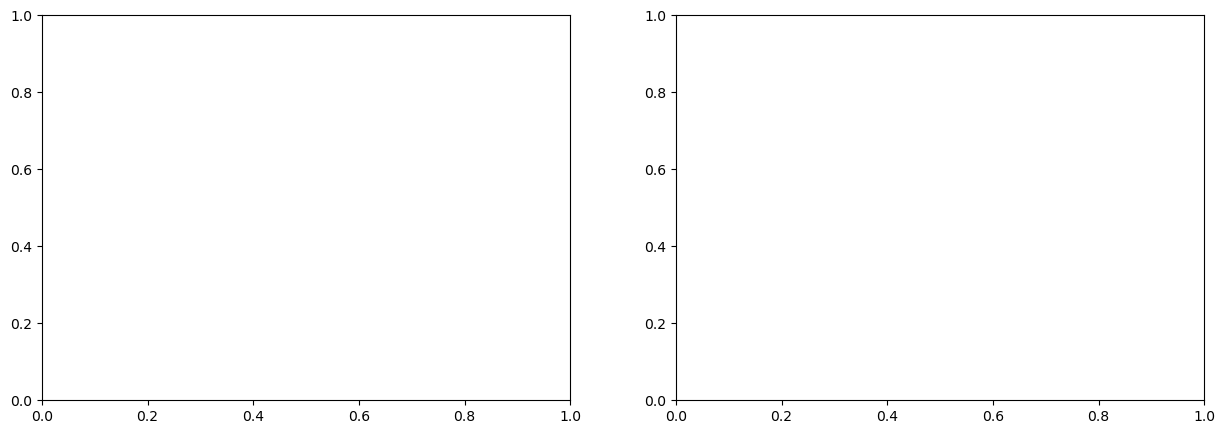

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
ol = sns.histplot(np.array(test_df['old_lotfrontage'].dropna()),ax=ax1,kde=True,bins=70)
lf = sns.histplot(np.array(test_df['LotFrontage']),ax=ax2,kde=True,bins=70,color='red')

test_df.drop('old_lotfrontage',axis=1,inplace=True)

* 위와 같이 처리를 해서 이상한 값에 대한 것들을 처리를 완료함

In [ ]:
# 빵구난 데이터 없는지 체크 : 위의 코드들에서 다 실행하고 내려오시면
# train_df/ test_df 모두 결측치가 없어야 합니다
# 혹시 여기서 0이나
train_df.isnull().sum().sum()

260

In [ ]:
print(train_df.shape)
print(test_df.shape)

In [ ]:
# 모델을 돌리기에 필요한 2가지 요소
# 1. 결측치 처리 -> 위의 진행은 여기까지 진행함
# 2. 숫자 데이터로 변환 인코딩: 라벨 인코딩, 원핫인코딩, 기타..........


###  변형 및 인코딩

#### 범주형 데이터 변형

In [ ]:
# 원핫인코딩을 할 컬럼들 ->  scikit-learn 변형이 코드를 돌려서 작성해야됨
#   간단하게 하는 방식 중 하나가 get_dummies
# 뒤에서 그냥  get_dummy로 처리할 것임...


nominals = ['MSSubClass','MSZoning','Street','Alley','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',
           'Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','GarageType','MiscFeature','SaleType','SaleCondition','MoSold','YrSold']

# 라벨인코딩을 할 떄에 주의사항 
# -> train에서 변환 규칙을 찾아서
#   그 규칙대로 train의 변형, test에도 train규칙을 그대로 면형
#   ++ test 셋에서 unseen data 나타날 수 있으니 에러처리를 해야함
# OR) unseen data 를 처리를 안하면, test에서 에러가 발생할 수 있음

for ord in ordinals:
    # 기존 ord 칼럼에 대해서 적용할 인코딩 모델을 준비
    le = LabelEncoder()
    # 변환에 대한 규칙을 학습: 단, train_df에서만 수행! 기준
    le.fit(train_df[ord])
    # train_df를 기준으로 설정한 기준을 train에 기대로 적용
    train_df[ord] = le.transform(train_df[ord])
    test_df[ord] = le.transform(test_df[ord]) # unseen data 처리
    
    # test에도 train의 규칙을 적용을 하기는 하는데, 처음보는 unseen data 처리
    # 기존 train에대한 룰을 체크
    prev_class = list(le.classes_)
    # test 데이터에서 unique 값들을 보고, 처음 본 종류가 나타나면 뒤로 추적
    for label in np.unique(test_df[ord]):
        if label not in prev_class:
            prev_class.append(label)
    le.classes_ = np.array(prev_class) # test에서 새로운 종류에 대해서도 
    # test에서 새로운 것들을 처리한 갱신 룰을 처리
    test_df[ord] = le.transform(test_df[ord])

#### 여기서는 순서가 중요한 변수들

In [ ]:
from sklearn.preprocessing import LabelEncoder

ordinals = ['LotShape','LandSlope','OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual',
           'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','Electrical','KitchenQual',
            'Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence']

~~~


#### House Price에 상관계수가 높은 거의 비슷한 컬럼들을 종합하여서 1개의 컬럼으로  변형

In [ ]:
# 기존의 컬럼들에 대한 병합을 통해서 컬럼 재조정...
# -> 기존 컬럼들을 기반으로 재형성/가공/// EDA + 도메인 지식
# ex) GrLivArea, TotalBsmtSF: 면적에 관련된 항목컬럼이라고 생각함,, 통하브ㅡㅡ
train_df['totalArea'] = train_df["GrLivArea"] + train_df['TotalBsmtSF']
test_df['totalArea'] = test_df["GrLivArea"] + test_df['TotalBsmtSF']


#### 수치 데이터의 분포를 보고, 얼마나 치우쳐서 있는지 확인 : +1보다 크고, -1보다 작으면 상당히 skew되어 있으며, -1~-0.5/ 0.5~1 사이에는 적당히 skew, -0.5~ 0.5 사이는 적당히 잘 분포

In [ ]:
~

,skewness
PoolQC,-22.996032
MiscVal,21.943440
PoolArea,18.711459
LotArea,13.130516
LowQualFinSF,12.086535


#### 위의 결과들이 엄청나게 skew되어 있어서 이에 대한 변형 수행 : log1p사용 : log(x+1)

In [ ]:
~

#### 기타 아직 변형이 안 되어 있는 아주 중요하지 않은 변수들(카테고리)을 처리

In [218]:
"""
위에서 남겨둔 원핫인코딩 기반의 인코딩을 수행을 하려고 함
-> 원핫인코딩을 하기에는 scikit-learn 에서는 조금 불편하고, 코드가 더 길어져
pandas 에서 있는 get_dummies 매서드를 활용해서 처리

예)국가 컬럼이 있음
train: 대한민국, 일본, 미국, 중국
test: 대한민국, 일본, 중국, 싱가포르 -> train에 있는 미국 컬럼이 날라가고
                                    -> train에 없는 싱가폴 칼럼 생성
-----> train/test의 컬럼에 대한 통일이 깨지게 됨
train/test: 대한민국, 일본, 미국, 중국, 싱가포르

-----> train/test에서 각기 다른 컬럼들이 생성이 될 수 있ㅇ서 모두 처리
컬럼 이름, 컬럼의 수도 각기 달라질 수 있으니 공통화 박업이 추가적으로 필요
국적_대한민국,
"""
train_df = pd.get_dummies(train_df, columns=nominals, prefix_sep="_" )
test_df = pd.get_dummies(test_df, columns = nominals, prefix_sep="_")
print(train_df.shape)
print(test_df.shape)


NameError: name 'nominals' is not defined

In [ ]:
df = pd.get_dummies(df)
print(df.shape)

(2915, 265)


In [ ]:
# 일반적으로 원핫인코딩 방식은 손 댈 부분이 많음;;
# why? 모양이 값에 따라서 틀어지는 것이 각양각색이 되기 때문
# -> 틀어진 모양에 대해서 수정을 하는 부분이 필요  = 기준: train
# case1: train에서만 존재를 하는 컬럼, test에서는 없는 컬럼. 
#   -> train에만 있는 컬럼을 test에 모양상 추가
# case2: train에서는 없지만, test에서 unseen data가 test에서만 있는 칼럼
#   -> test에서 해당 컬럼을 제거


In [ ]:
# 처리할 데이터들에 대한 컬럼을 리스트업
# -> get_dummies 에서 _를 통해서 새롭게 생성된 컬럼들 입니다
cat_dummies = [for col in train_df if "_" in col and col.split("_")[0] in nominals]
cat_dummies
# -> train_df 를 기준으로 get_dummies 를 했을 때 생성된 컬럼들을 리스트업
# 처리할 기준에 대한 컬럼을 리스트업
# case1) train에만 있고, test에는 없는 경우 -> test에 컬럼을 추가, 0으로 채우기
for col in test_df.columns:
    if col not in test_df.columns: # train에만 추가된 컬럼들이라면
        print("컬럼추가:", col)
        test_df[col] = 0
        
# case2) test의 unseen data 에 대한 부분
#       조건: 파생된 컬럼, 앞부분이 처리한 종류
for col in test_df.columns:
    if ("_" in col) and (col.split("_")[0] in nominals) and (col not in cat_dummies):
        print("테스트에서 발생한 unseen data:", col)
        test_df.drop(col, axis=1, inplace= True)
        
        
    

In [ ]:
########### + option
# 숫자값들에 대한 조정 scaler
# 0~255: 0~1 min/max scaler, 평균0/표준편차1로: standardscaler
        # (값은 0~1 범위, 분표 틀어), (값은 - 무한대+무한대, 정규분포)
        # ==> 선형모델을 기반으로 하기 위해서 모든 숫자 값들을 정규분포틱하게 변경

In [219]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# 정규화 작업을 진행
scaler = StandardScaler()
# 규칙을 train에서 학습
scaler.fit(train_df)

In [ ]:
# train_df 에 대해서 규칙을 찾았으면...
# train_df 에도 그 룰 대로 변환, test_df 에도 train_df 룰대로 변환

X_train = scaler.transform(train_df)
X_train = pd.DataFrame(X_train, columns=train_df.columns)

# test에서도 동일한 규칙 적용 * 컬럼이름 재정리
test_df = pd.DataFrame(test_df, columns=train_df.columns)
X_test = scaler.transform(test_df)
X_test = pd.DataFrame(X_test, columns=train_df.columns)

In [ ]:
X_train.head()

In [ ]:
# 만들ㅇ진 데이터 셋이나, 교재나 이론적인 설명을 위해서 가지고 오는 데이터 셋은
# 전처리에 별 이슈가 없음 -> 대회나 실제 일을 하실 때에는 전처리를 할 때 주의 + unseen data 

# 1. 인코딩에서 라벨인코딩을 할 때 test에서 unseen 만 신경쓰면 됨
# 2. 인코딩에서 원핫인코딩을 할 때 train 에서 unseen, test 에서 unseen 모두 신경
#       + 순서가 틀어지기에 순서를 다시 정리하고, 모양을 맞추는 작업

#  ->   누락된 값을 채울 때.. test에서 cheating 을 하면 안 되게 코드 작성
#       누락된 값을 채울때 대표값이나 기준 값을 train을 기준으로만 해얃함

# 실질적으로는 코드가 좀 길어지고, 복잡해지는 경향 있음
# 

### Train / Test  분리

In [ ]:
~~

In [ ]:
# 참고로 원래의 데이터가 train / test 가 1456개, 1459개로 거의 동일한 크기의 데이터가 주어진 것!!!
print("training shape:{}, test shape:{}".format(X_train.shape,X_test.shape))

training shape:(1456, 265), test shape:(1459, 265)


### 모델링

* xgboost를 윈도우에서 사용하시는 분들은 경로 설정 추가 필요     
* mlxtend 패키지 설치

In [ ]:

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,learning_curve, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

from sklearn.linear_model import LassoCV,ElasticNetCV,Lasso,ElasticNet
from sklearn.kernel_ridge import KernelRidge


# 아래 추가적인 패키지가 설치가 되어 있어야 함!!!!!!!
from xgboost import XGBRegressor
from mlxtend.regressor import StackingRegressor

# 시간
import time

#### 정규화 작업

In [ ]:
scaler = StandardScaler()
~~

In [ ]:
y_df.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [ ]:
y_df.shape

(1456,)

In [ ]:
#  참고) 위에서 제일 원본 데이터는 208500이였는데, 이것을 log1p로 변환한 것을 정답지로 놓고 하는 것이니
# 하기 전에 맞게 변환이 되었는지 확인!!!!!!
np.log1p(208500)

12.24769911637256

#### 모델의 종류들 : 평가는 root-mean-squared-error 로 평가

        Ridge Regression
        Lasso Regression
        ElasticNet Regression
        Support Vector Machine
        Random Forest
        XG Boost

##### 평가 및 kfold 사용 준비

In [ ]:
kfold = ~

In [ ]:
~~~

##### 참고) 평가지표

<img src="img/01.png">
<img src="img/02.png">
<img src="img/03.png">
<img src="img/04.png">
<img src="img/05.png">
<img src="img/06.png">

* RMSLE 의 특징 : 하지만 kaggle 에서의 평가 지표는 RMSE 임!<br>
<img src="img/07.png">
<img src="img/08.png">
<img src="img/09.png">

ref ) https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-17-%ED%9A%8C%EA%B7%80-%ED%8F%89%EA%B0%80-%EC%A7%80%ED%91%9C

* Scikit-Learn의 평가 지표

<img src="img/10.png">

##### Rigid 

* ref ) https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html#sklearn.kernel_ridge.KernelRidge

In [ ]:
import time

In [ ]:
~

Fitting 6 folds for each of 480 candidates, totalling 2880 fits
Run Time :  74.40866947174072
KernelRidge(coef0=2.0, gamma=0.0008211879055212056, kernel='polynomial')


In [ ]:
score = rmsle_cv(KR_best)
print("Kernel Ridge mean score:", score.mean())
print("Kernel Ridge std:", score.std())

Kernel Ridge mean score: 0.11196564169797972
Kernel Ridge std: 0.007929655583876236


* 위의 부분을 너무 많이 설정을 하게 되면, 좀 자세히 찾을 수 있겠지만, 너무 시간이 오래 걸리는 부분들이 발생을 한다. 그래서 아래와 같이 randomSearchCV를 사용해보려고 함!!!

In [ ]:
~

RandomizedSearchCV took 7.21 seconds for 20 candidates parameter settings.
KernelRidge(alpha=0.1, coef0=1.5, degree=2, gamma=0.0008211879055212056,
            kernel='polynomial')


In [ ]:
~

Kernel Ridge mean score: 0.11242370382925089
Kernel Ridge std: 0.008361009490468354


In [ ]:
~

##### Lasso Regression

* ref) https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [ ]:
~~~

##### ElasticNet Regression

##### Support Vector Machine

* SVR : Support Vector Machine Regression    
    https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

##### Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,learning_curve, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

* ref) https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

##### XG Boost¶

### Ensemble - Stacked Regression and GridSearch

In [ ]:
print("source: https://rasbt.github.io/mlxtend/user_guide/regressor/StackingCVRegressor/")
Image(url= "https://rasbt.github.io/mlxtend/user_guide/regressor/StackingCVRegressor_files/stacking_cv_regressor_overview.png")

source: https://rasbt.github.io/mlxtend/user_guide/regressor/StackingCVRegressor/


In [ ]:
XGB = XGBRegressor()

ELNET = ElasticNet(random_state = 1)
LCV=Lasso(random_state = 1)
SV = SVR()
KR = KernelRidge()
XG = XGBRegressor()
stack = StackingRegressor(regressors = [ELNET,LCV,XG,SV,KR], meta_regressor = XGB)

params = {       
        # mlxtend : 0.17 이하 버전기준..
    
#               'meta-xgbregressor__n_estimators' : [740*2],#740
#               'meta-xgbregressor__learning_rate': [0.01/2], #0.01
#                'meta-xgbregressor__min_child_weight':[0],
#               'meta-xgbregressor__gamma':[0.1],
#               'meta-xgbregressor__max_depth': [2],
#               'meta-xgbregressor__subsample':[0.65],
#               'meta-xgbregressor__colsample_bytree':[0.4],
#               'meta-xgbregressor__reg_alpha':[0],
#               'meta-xgbregressor__reg_lambda':[1],
    
        # mlxtend : 0.17 버전 기준 : http://rasbt.github.io/mlxtend/user_guide/regressor/StackingRegressor/
                'meta_regressor__n_estimators' : [740*2],#740
              'meta_regressor__learning_rate': [0.01/2], #0.01
               'meta_regressor__min_child_weight':[0],
              'meta_regressor__gamma':[0.1],
              'meta_regressor__max_depth': [2],
              'meta_regressor__subsample':[0.65],
              'meta_regressor__colsample_bytree':[0.4],
              'meta_regressor__reg_alpha':[0],
              'meta_regressor__reg_lambda':[1],
              
              'lasso__alpha':[0.00244736842105],
              'elasticnet__alpha':[0.0276315789474],
              'elasticnet__l1_ratio':[0.09],
              'xgbregressor__min_child_weight':[0.2],
              'xgbregressor__n_estimators' : [870],
              'xgbregressor__learning_rate': [0.04],
              'xgbregressor__gamma':[0],
              'xgbregressor__max_depth': [3],
              'xgbregressor__subsample':[0.8],
              'xgbregressor__colsample_bytree':[0.7],
    
              'kernelridge__alpha':[0.93],
              'kernelridge__coef0':[1.5],
              'kernelridge__degree':[3],
              'kernelridge__gamma':[0.001],
              'kernelridge__kernel':['polynomial'],
              'kernelridge__kernel_params':[None],
              
              'svr__coef0':[1.6],
              'svr__kernel':['poly'],
              'svr__epsilon':[0.03],
              'svr__gamma': ['auto'],
              'svr__degree': [2],
              'svr__C':[0.1]
        }


grid = GridSearchCV(estimator = stack, param_grid=params,cv=kfold,refit=True, verbose=1,n_jobs=-1,
                    scoring="neg_mean_squared_error")
grid.fit(X_train, y_df)
grid_best = grid.best_estimator_
print(grid_best)


Fitting 6 folds for each of 1 candidates, totalling 6 fits


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


StackingRegressor(meta_regressor=XGBRegressor(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.4, gamma=0.1,
                                              gpu_id=None,
                                              importance_type='gain',
                                              interaction_constraints=None,
                                              learning_rate=0.005,
                                              max_delta_step=None, max_depth=2,
                                              min_child_weight=0, missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=1480, n_jobs=N...
                                           monotone_constraints=None,
                                           n_estimator

In [ ]:
print("Stacking mean score:", rmsle_cv(grid_best).mean())
print("Stacking std:", rmsle_cv(grid_best).std())

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sli

Stacking mean score: 0.10965167617103806


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sli

Stacking std: 0.007711620983802349


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [ ]:
y_submission_st = np.expm1(grid.predict(X_test))

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


#### Ensemble - Averaging

In [ ]:
y_submission_avg

array([124056.85026802, 163477.36877579, 190004.76706499, ...,
       160385.34579887, 116675.410491  , 221924.31341818])

* 제출 준비

In [ ]:
my_submission = pd.DataFrame()
my_submission['Id'] = test_id
my_submission['SalePrice'] = y_submission_avg
my_submission.to_csv('submission_trail_ver_0-1.csv',index=False)


<img src="img/11.png">

### To Do List

Mission : 위의 성능보다 더 나은 모델을 만들어 제출하시오!!!